In [1]:
import pandas as pd
import requests
from io import StringIO

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Scrape data from the UCI Machine Learning Repository (Auto MPG dataset)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
response = requests.get(url)

In [5]:
# Parse the data and create a DataFrame
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']
auto_mpg_df = pd.read_csv(StringIO(response.text), delim_whitespace=True, names=column_names)

In [6]:
# Save the dataset to a CSV file
auto_mpg_df.to_csv('auto_mpg_dataset.csv', index=False)
print('Dataset saved to auto_mpg_dataset.csv')

Dataset saved to auto_mpg_dataset.csv


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer


In [8]:
# Load the saved dataset from the CSV file
auto_mpg_df = pd.read_csv('auto_mpg_dataset.csv', na_values='?')

In [9]:
auto_mpg_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [10]:
auto_mpg_df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,chevy s-10


In [11]:
auto_mpg_df.shape

(398, 9)

In [12]:
auto_mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car Name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [13]:
auto_mpg_df.describe

<bound method NDFrame.describe of       MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin                   Car Name  
0            70       1  chevrolet chevelle mali

<Axes: xlabel='Car Name'>

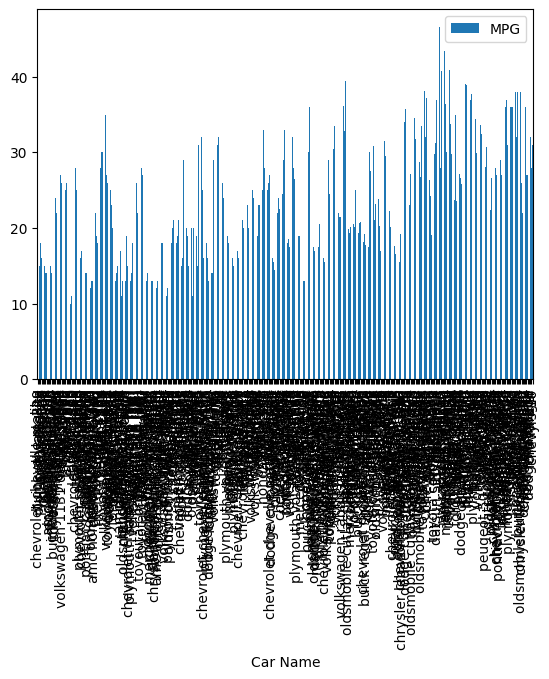

In [14]:
auto_mpg_df.plot(x="Car Name", y="MPG", kind="bar") 

In [15]:
# Drop the 'Car Name' column
auto_mpg_df = auto_mpg_df.drop('Car Name', axis=1)

# Assume 'MPG' is the target variable, and other columns are features
X = auto_mpg_df.drop('MPG', axis=1)
y = auto_mpg_df['MPG']

print(y.shape)

(398,)


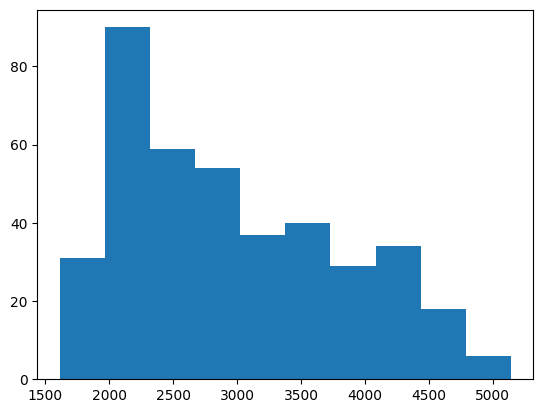

In [16]:
plt.hist(X["Weight"]) 
plt.show() 

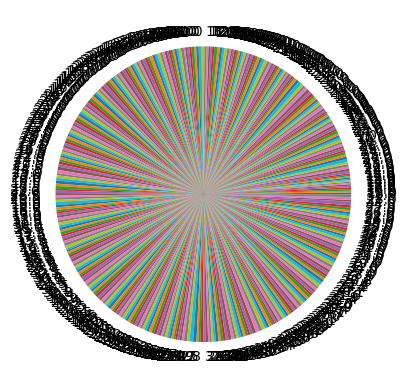

In [17]:
plt.pie(auto_mpg_df["Acceleration"], labels=(auto_mpg_df["MPG"]))
plt.show()

In [18]:
X.isnull().sum()

Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

Line graph: 


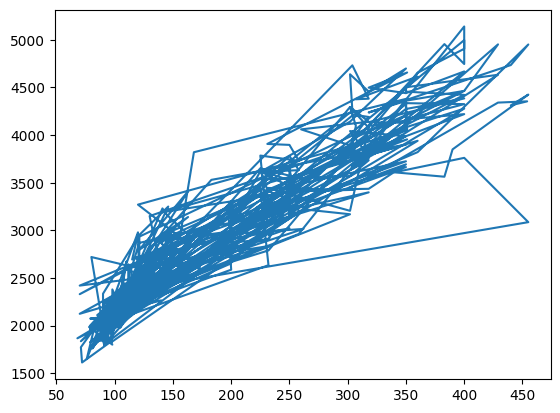

Scatter Plot:  


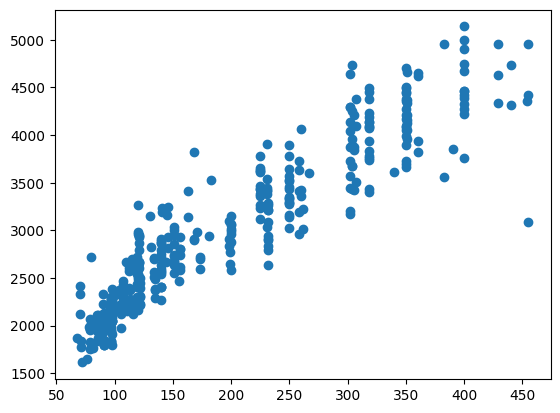

In [19]:
# plotting a line graph 
print("Line graph: ") 
plt.plot(auto_mpg_df["Displacement"], auto_mpg_df["Weight"]) 
plt.show() 
  
# plotting a scatter plot 
print("Scatter Plot:  ") 
plt.scatter(auto_mpg_df["Displacement"], auto_mpg_df["Weight"]) 
plt.show() 

c:\Users\ragha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ragha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


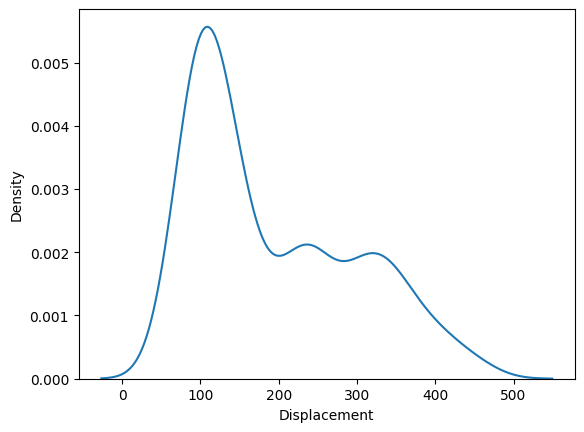

C:\Users\ragha\AppData\Local\Temp\ipykernel_7816\3373508818.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(auto_mpg_df["Weight"]); plt.show()
c:\Users\ragha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ragha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.us

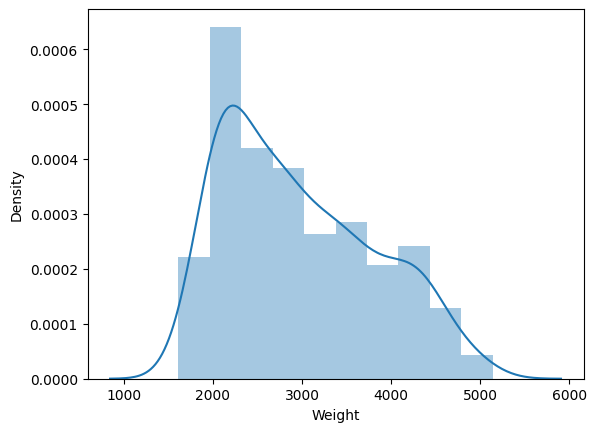

In [20]:
sns.kdeplot(auto_mpg_df["Displacement"]); plt.show()
sns.distplot(auto_mpg_df["Weight"]); plt.show()

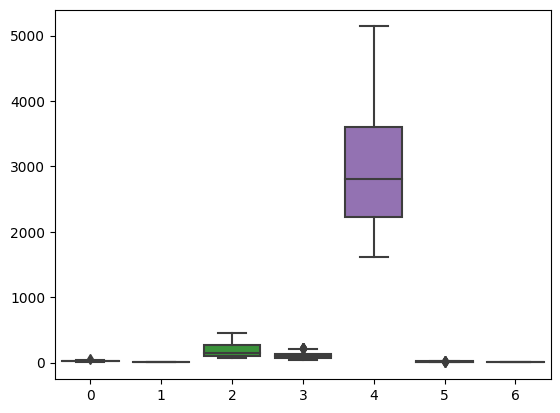

In [21]:
sns.boxplot([auto_mpg_df["MPG"],auto_mpg_df["Cylinders"],auto_mpg_df["Displacement"],auto_mpg_df["Horsepower"],	auto_mpg_df["Weight"],	auto_mpg_df["Acceleration"]	,auto_mpg_df["Origin"]])
plt.show()

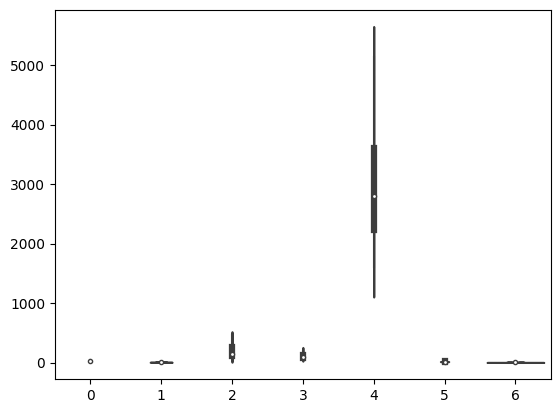

In [22]:
sns.violinplot([auto_mpg_df["MPG"],auto_mpg_df["Cylinders"],auto_mpg_df["Displacement"],auto_mpg_df["Horsepower"],	auto_mpg_df["Weight"],	auto_mpg_df["Acceleration"]	,auto_mpg_df["Origin"]])
plt.show()

In [23]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Use mean imputation for simplicity
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

print(X_imputed)


     Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  \
0          8.0         307.0       130.0  3504.0          12.0        70.0   
1          8.0         350.0       165.0  3693.0          11.5        70.0   
2          8.0         318.0       150.0  3436.0          11.0        70.0   
3          8.0         304.0       150.0  3433.0          12.0        70.0   
4          8.0         302.0       140.0  3449.0          10.5        70.0   
..         ...           ...         ...     ...           ...         ...   
393        4.0         140.0        86.0  2790.0          15.6        82.0   
394        4.0          97.0        52.0  2130.0          24.6        82.0   
395        4.0         135.0        84.0  2295.0          11.6        82.0   
396        4.0         120.0        79.0  2625.0          18.6        82.0   
397        4.0         119.0        82.0  2720.0          19.4        82.0   

     Origin  
0       1.0  
1       1.0  
2       1.0  
3      

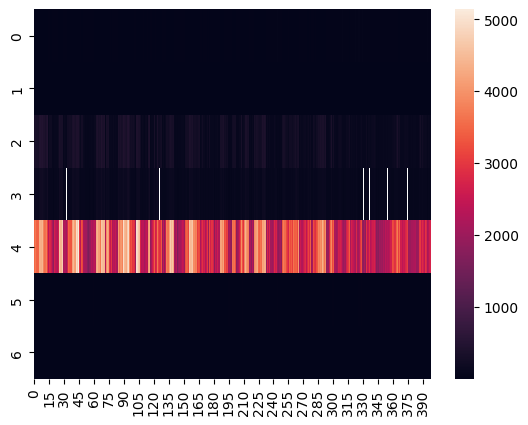

In [24]:
sns.heatmap([auto_mpg_df["MPG"],auto_mpg_df["Cylinders"],auto_mpg_df["Displacement"],auto_mpg_df["Horsepower"],	auto_mpg_df["Weight"],	auto_mpg_df["Acceleration"]	,auto_mpg_df["Origin"]],annot=False, fmt="d")
plt.show()

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

print("Splitting done")

Splitting done


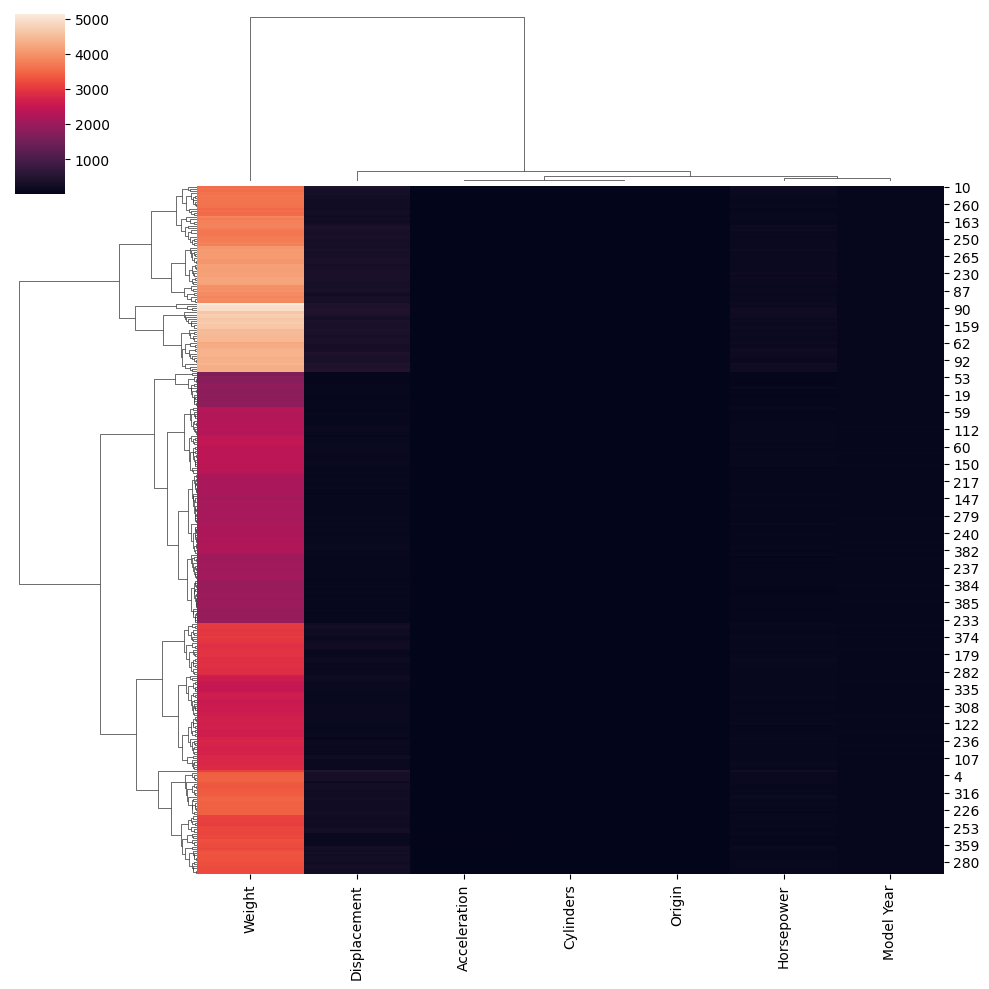

In [26]:
sns.clustermap(X_train)
plt.show()

In [27]:
print(X_train)
print(y_train)

     Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  \
3          8.0         304.0       150.0  3433.0          12.0        70.0   
18         4.0          97.0        88.0  2130.0          14.5        70.0   
376        4.0          91.0        68.0  2025.0          18.2        82.0   
248        4.0          91.0        60.0  1800.0          16.4        78.0   
177        4.0         115.0        95.0  2694.0          15.0        75.0   
..         ...           ...         ...     ...           ...         ...   
71         3.0          70.0        97.0  2330.0          13.5        72.0   
106        8.0         350.0       180.0  4499.0          12.5        73.0   
270        4.0         134.0        95.0  2515.0          14.8        78.0   
348        4.0          89.0        62.0  2050.0          17.3        81.0   
102        4.0          97.0        46.0  1950.0          21.0        73.0   

     Origin  
3       1.0  
18      3.0  
376     3.0  
248    

In [28]:
print(X_test)
print(y_test)

     Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  \
198        4.0          91.0        53.0  1795.0          17.4        76.0   
396        4.0         120.0        79.0  2625.0          18.6        82.0   
33         6.0         232.0       100.0  2634.0          13.0        71.0   
208        8.0         318.0       150.0  3940.0          13.2        76.0   
93         8.0         318.0       150.0  4237.0          14.5        73.0   
..         ...           ...         ...     ...           ...         ...   
249        8.0         260.0       110.0  3365.0          15.5        78.0   
225        6.0         250.0       110.0  3520.0          16.4        77.0   
367        4.0         112.0        88.0  2605.0          19.6        82.0   
175        4.0          90.0        70.0  1937.0          14.0        75.0   
285        8.0         305.0       130.0  3840.0          15.4        79.0   

     Origin  
198     3.0  
396     1.0  
33      1.0  
208    

In [29]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Fitting done")

Fitting done


In [30]:
import joblib

# ... (your training code here)

# Save the trained model to a file
joblib.dump(model, 'auto_mpg_model.pkl')

print("Dumping done")

Dumping done


c:\Users\ragha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ragha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ragha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ragha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

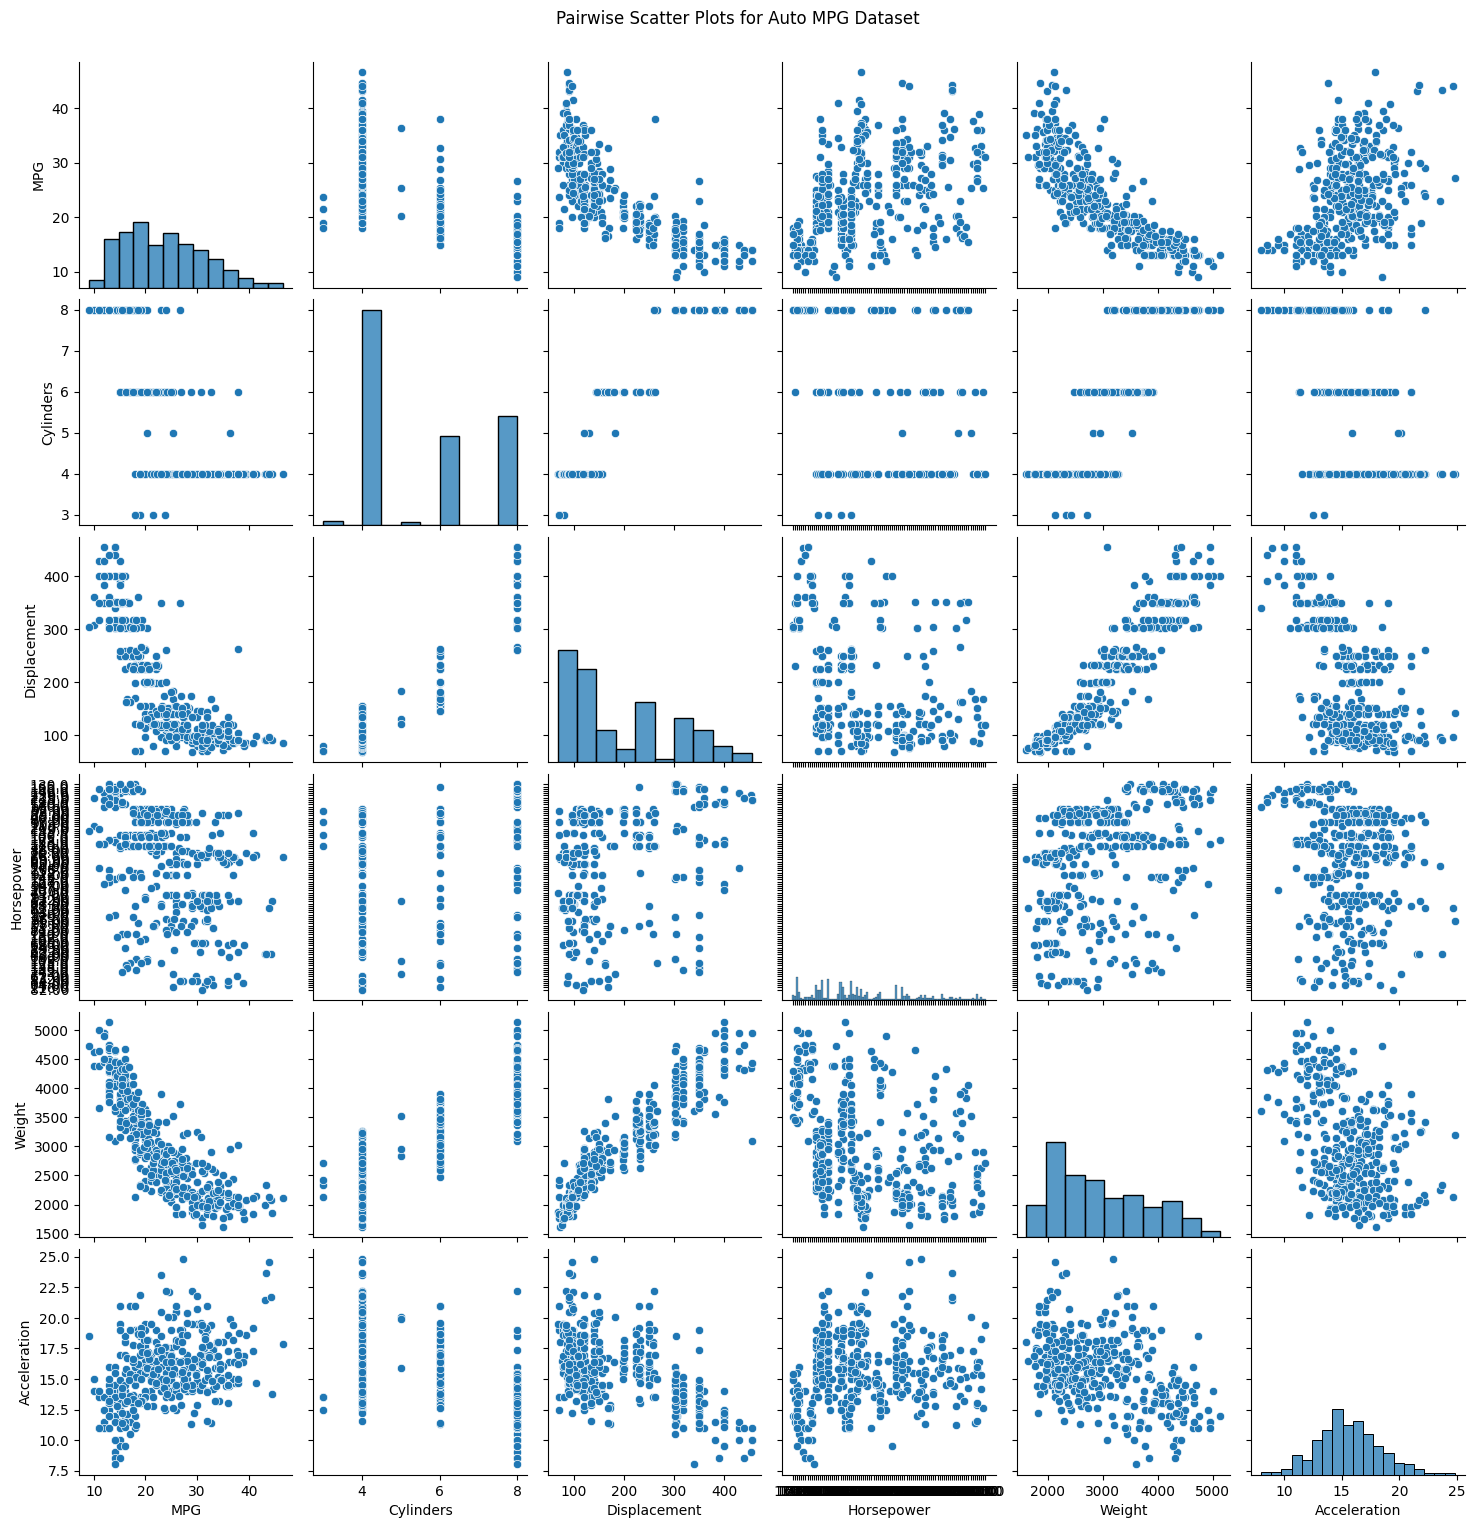

In [31]:
# Load the saved dataset from the CSV file
auto_mpg_df = pd.read_csv('auto_mpg_dataset.csv')

# Visualize the relationship between MPG and other features using scatter plots
sns.pairplot(auto_mpg_df, vars=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration'], kind='scatter')
plt.suptitle('Pairwise Scatter Plots for Auto MPG Dataset', y=1.02)
plt.show()

In [33]:
from flask import Flask, render_template, request
import pandas as pd
import joblib
from sklearn.impute import SimpleImputer
app = Flask(__name__)

model = joblib.load('auto_mpg_model.pkl')

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():

        cylinders = float(request.form['cylinders'])
        displacement = float(request.form['displacement'])
        horsepower = float(request.form['horsepower'])
        acceleration = float(request.form['acceleration'])
        modelyear = float(request.form['modelyear'])
        origin = float(request.form['origin'])
        weight = float(request.form['weight'])

        input_data = {'Cylinders': [cylinders], 'Displacement': [displacement], 'Horsepower': [horsepower],'Weight' : [weight], 'Acceleration' : [acceleration] , 'Model Year' : [modelyear], 'Origin' : [origin]}

        input_df = pd.DataFrame(input_data)

        predictions = model.predict(input_df)

        result = f'Predicted MPG: {predictions[0]:.2f}'
        return render_template('index.html', result=result)


if __name__ == '__main__':
    app.run(port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [23/Sep/2024 00:26:05] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [23/Sep/2024 00:26:06] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [23/Sep/2024 00:26:23] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [23/Sep/2024 00:26:35] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [23/Sep/2024 00:26:44] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [23/Sep/2024 00:27:01] "POST /predict HTTP/1.1" 200 -
